# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd
import scipy 
import warnings
warnings.filterwarnings("ignore")
# load the training dataset
real_estate = pd.read_csv('real_estate.csv')
real_estate.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

## Step 1 - Explore the data

In this section I'll dive in the dataset in order to understand better the data, and also cleaning it, if necessary.  

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
real_estate.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


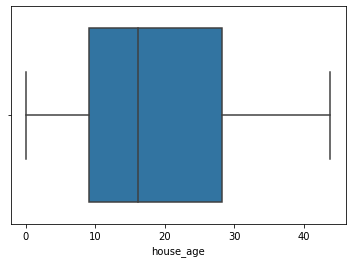

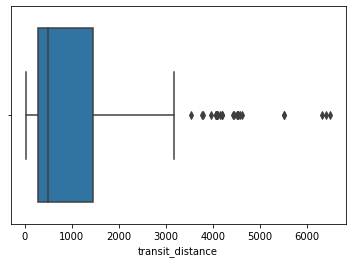

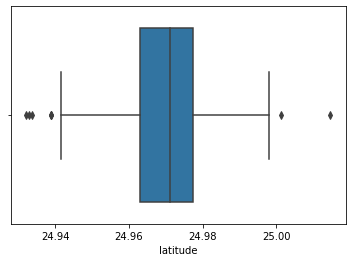

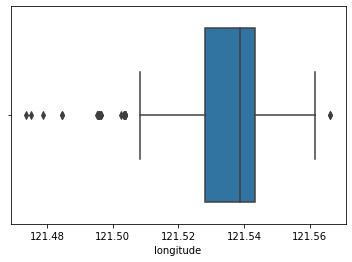

In [4]:
#Plotting the boxplot of all non-categoric features.

features=["house_age", "transit_distance", "latitude", "longitude"]

for column in features:
    sns.boxplot(x=column, data=real_estate)
    plt.show()

    

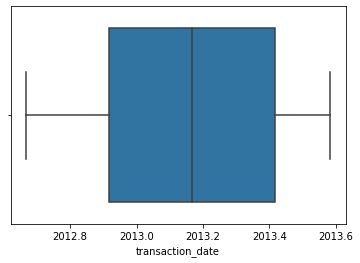

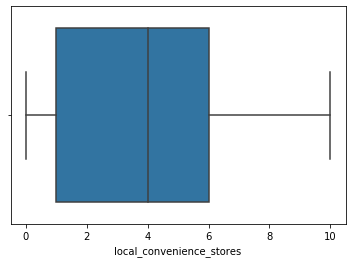

In [5]:
#Now plotting boxplot for categorical values

cat_features=["transaction_date", "local_convenience_stores"]

for column in cat_features:
    sns.boxplot(x=column, data=real_estate)
    plt.show()

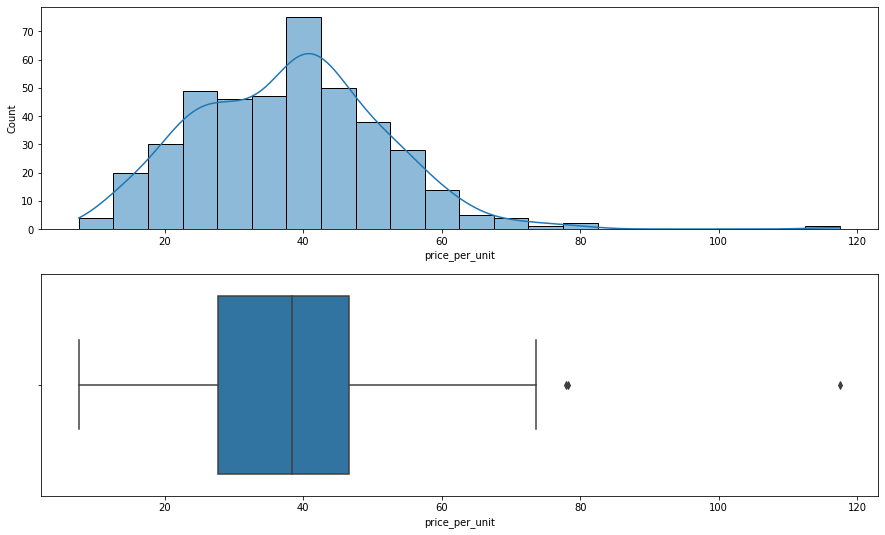

In [6]:
#Last but not least, our label distribution

label = real_estate["price_per_unit"]

fig, ax = plt.subplots(2,1,figsize=(15,9))
sns.histplot(x="price_per_unit", data=real_estate, ax=ax[0], kde=True)
sns.boxplot(x="price_per_unit", data=real_estate, ax=ax[1])
plt.show()

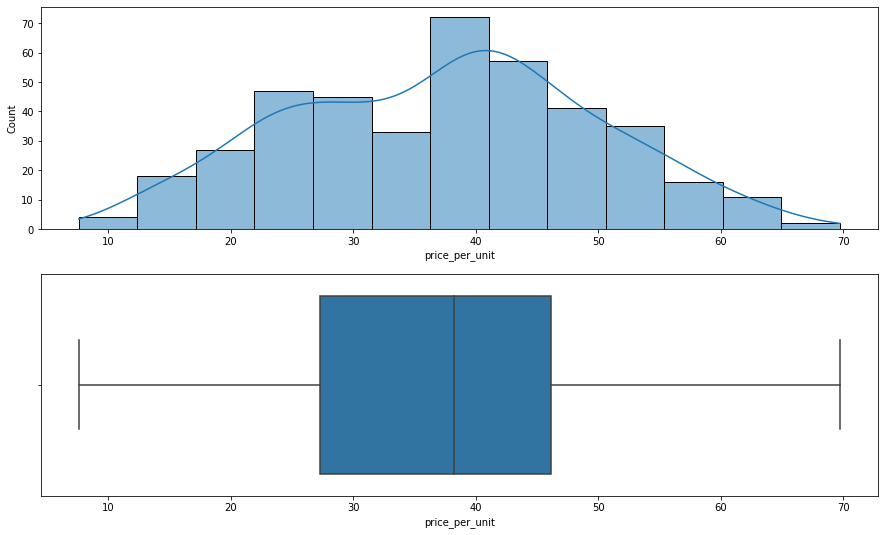

In [7]:
## Removing outliers

real_estate=real_estate[real_estate["price_per_unit"]<70]

label = real_estate["price_per_unit"]

fig, ax = plt.subplots(2,1,figsize=(15,9))
sns.histplot(x="price_per_unit", data=real_estate, ax=ax[0], kde=True)
sns.boxplot(x="price_per_unit", data=real_estate, ax=ax[1])
plt.show()

## Finding correlations

This section focus in finding the **correlations** between the **features** and the **label**. I'll start with the non-categoric features.

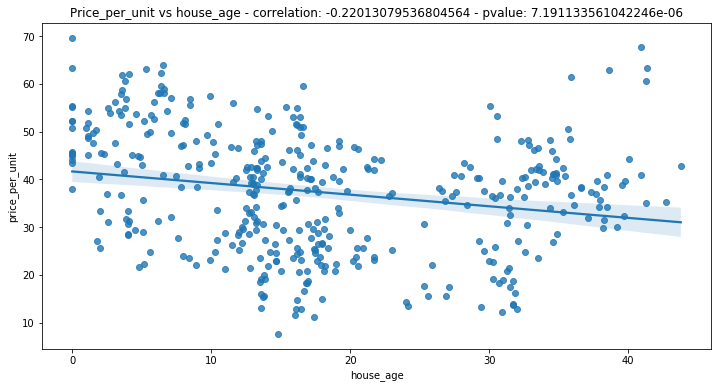

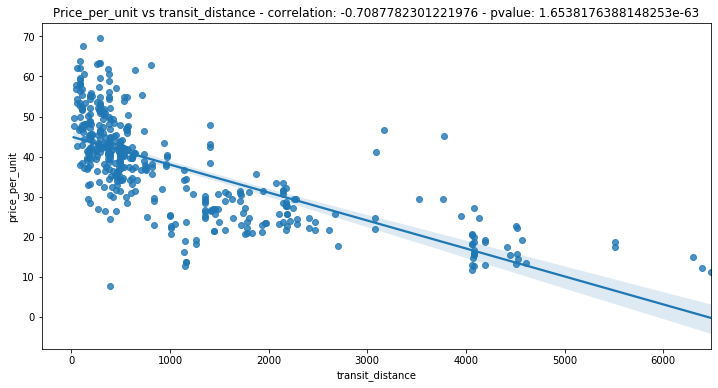

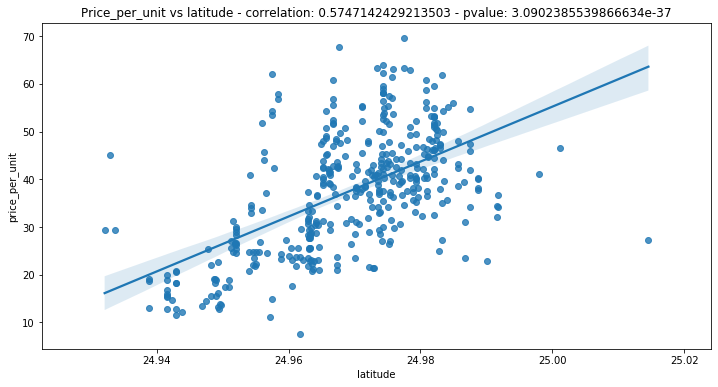

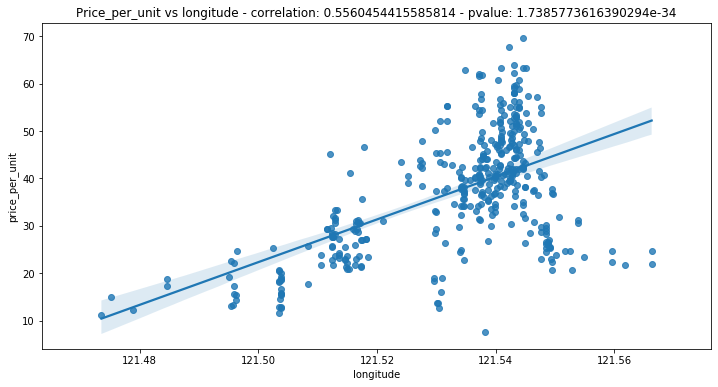

In [8]:
#features=["house_age", "transit_distance", "latitude", "longitude"]
#label = price_per_unit
for column in features:
    fig = plt.figure(figsize=(12, 6))
    column_list = real_estate[column].to_list()
    label_list = label.to_list()
    corr, p_value = scipy.stats.pearsonr(column_list, label)
    ax = sns.regplot(x=column, y=label, data=real_estate)
    ax.set_title('Price_per_unit vs ' + column + ' - correlation: ' + str(corr) + ' - pvalue: ' + str(p_value))
    plt.show()    
    

Since the **Pvalue** is in **good range** and all the correlations have a reasonable value, **all this features will be considered** in further calculations.

Now the correlations between the **categorical features**. 

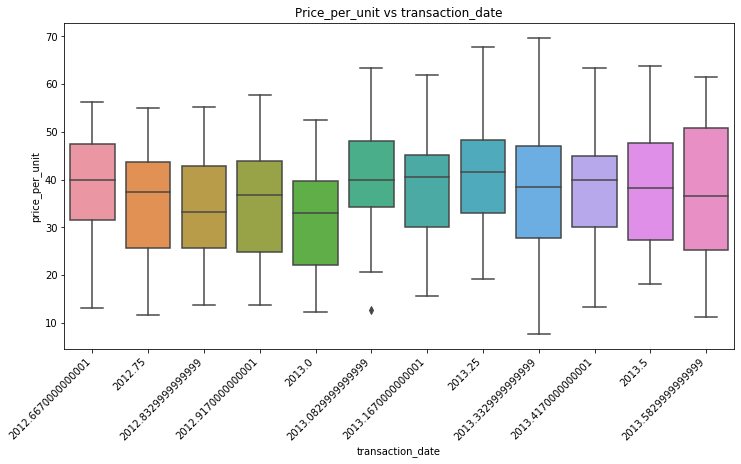

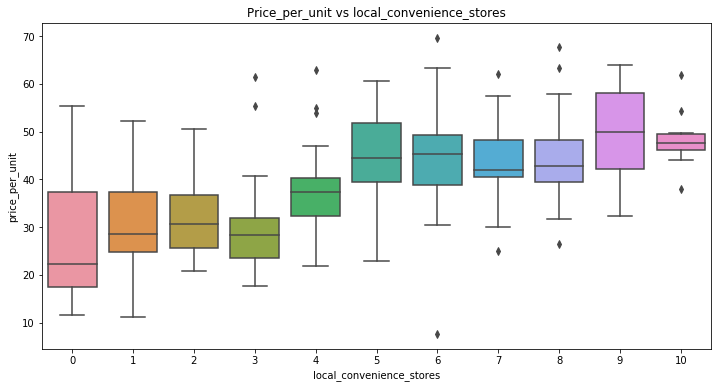

In [9]:
#cat_features=["transaction_date", "local_convenience_stores"]

for column in cat_features:
    fig = plt.figure(figsize=(12, 6))
    ax = sns.boxplot(x=column, y=label, data=real_estate)
    
    if column == "transaction_date":
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment = 'right')
    
    ax.set_title('Price_per_unit vs ' + column )
    plt.show()

**Transaction_date** does **not** seem to have a **correlation**, therefore it **won't be used** in further calculations. 

## Splitting the data

First of all, split the data

In [10]:
from sklearn.model_selection import train_test_split

X,y = real_estate[real_estate.columns[1:-1]].values, real_estate[real_estate.columns[-1]].values

#Splitting the data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0) 

print('Training Set: %d, rows\nTest Set: %d, rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 285, rows
Test Set: 123, rows


## Preprocessing the data

In [11]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Create preprocessing and training pipeline
train_SVR = SVR()
train_Linear = LinearRegression()
train_RF = RandomForestRegressor()

The SVR() model has the following results:
MSE: 47.819376d
RMSE: 6.915155
R2: 0.591955

Now checking it visually



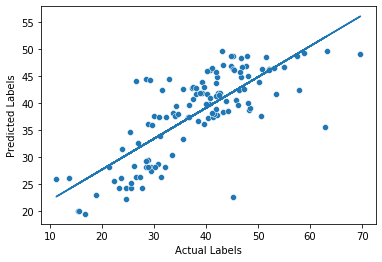

-------------------------------------------------------
The LinearRegression() model has the following results:
MSE: 58.284347d
RMSE: 7.634419
R2: 0.502657

Now checking it visually



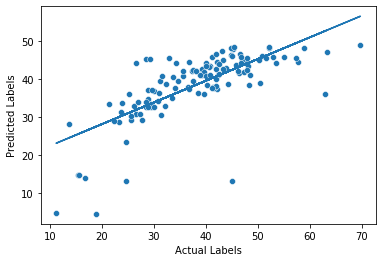

-------------------------------------------------------
The RandomForestRegressor() model has the following results:
MSE: 37.598144d
RMSE: 6.131733
R2: 0.679173

Now checking it visually



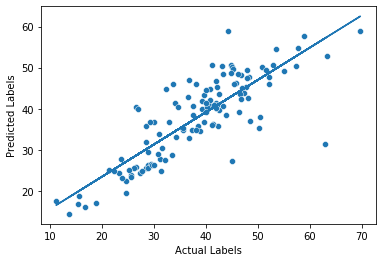

-------------------------------------------------------


In [12]:
from sklearn.metrics import mean_squared_error, r2_score
models = [train_SVR, train_Linear, train_RF]

for element in models:
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', element)])
    model = pipeline.fit(X_train, (y_train)) 
    #Predictions
    predictions = model.predict(X_test)
    #Display metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    #printing results
    print('The %s model has the following results:\nMSE: %fd\nRMSE: %f\nR2: %f\n' % (element, mse, rmse,r2)) 
    print("Now checking it visually\n")
    sns.scatterplot(y_test, predictions)
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    z = np.polyfit(y_test, predictions, 1)
    p = np.poly1d(z)
    plt.plot(y_test,p(y_test))
    plt.show()
    print('-------------------------------------------------------')

It's clearly that **RandomForestRegressor is the better model** to this problem. The others regression models are very likely since they have minor differences between them. But with a close eyes it's possible to see some points in different positions.

## Optimize Hyperparameters

I already discover that RandomForestRegressor is the choosen one. Now, it's time to improve it.

When using hyperparametrization it's possible to train different configurations of a same algorithm and then choose what gives the best output.

In [13]:
from sklearn.model_selection import GridSearchCV

RF = RandomForestRegressor()

parameters = dict(
                   n_estimators = [100,200,300],
                   max_depth = [5, 10],
                   warm_start = [True, False]
                  )

RF_clf = GridSearchCV(RF, parameters)
RF_trained = RF_clf.fit(X_train, y_train)
RF_trained.best_params_

{'max_depth': 5, 'n_estimators': 100, 'warm_start': True}

The RandomForestRegressor() model has the following results:
MSE: 36.588519
RMSE: 6.048844
R2: 0.687789

Now checking it visually



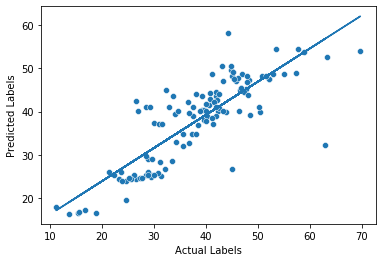

In [14]:
## Checking the new results

#Predictions
predictions = RF_trained.predict(X_test)
#Display metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
#printing results
print('The %s model has the following results:\nMSE: %f\nRMSE: %f\nR2: %f\n' % (element, mse, rmse,r2)) 
print("Now checking it visually\n")
sns.scatterplot(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test))
plt.show()

That's actually good, GridSearchCV were capable of bring **MSE to 36.5 instead of 37.5**.

In [15]:
# Your code to use the trained model